In [1]:
import copy
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import functions
ori_file = 'C:\\Users\HanLi\Desktop\Arch_Research\Ecadia\data.json'
output_path = "C:\\Users\\HanLi\\Desktop\\Arch_Research\\Ecadia\\GNN\\pre_processed_data"

In [64]:
# process data of Graph_1
f= open(ori_file,'r')
ori_data_po = json.load(f)
ori_data = ori_data_po.values()
Gs_1 = []
for data in ori_data:
    g = data["graph"]
    G = nx.Graph()
    for room in g.keys():
        adj_rooms =  g[room]
        for adj_room in adj_rooms.keys():
            G.add_edge(room,adj_room,weight = adj_rooms[adj_room])
    Gs_1.append(G)
for i in range(len(Gs_1)):
    nx.write_gml(Gs_1[i],output_path+"\\data_1\\Gs_1_{}.gml".format(i))

In [69]:
# process data of Graph_2
Gs_2 = []
import os
path = 'C:\\Users\\HanLi\\Desktop\\Arch_Research\\Ecadia\\GNN\\graphs\\'
for file_path in os.listdir(r'C:\Users\HanLi\Desktop\Arch_Research\Ecadia\GNN\graphs'):
    data = open(path+file_path,'r')
    rooms = json.load(data)
    G = nx.Graph()
    for room in rooms:
        for adj_room in room['connections']:
            G.add_edge(room['label'],rooms[adj_room['node']]['label'])
    Gs_2.append(G)
Gs_3 =[]
for G in Gs_2:
    if G.has_node('Bedroom0') and G.number_of_nodes() >= 4:
        Gs_3.append(G)
for i in range(len(Gs_3)):
    nx.write_gml(Gs_3[i],output_path+"\\data_2\\Gs_2_{}.gml".format(i))

In [2]:
#load Graph_1 and process
Gs_1 = []
for i in range (3493):
    G = nx.read_gml(output_path+"\\data_1\\Gs_1_{}.gml".format(i))
    Gs_1.append(G)
    Gs_1[i] = functions.relabel(Gs_1[i])

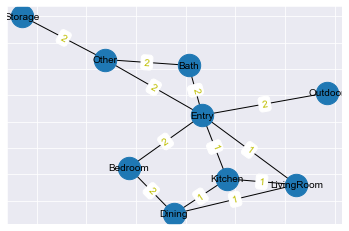

In [6]:
functions.visualize(Gs_1[273])

In [55]:
for i in range(len(Gs_1)):
    if nx.number_connected_components(Gs_1[i]) > 1:
        Gs_1[i] = Gs_1[i].subgraph(max(nx.connected_components(Gs_1[i]),key = len))
for G in Gs_1:
    if functions.cal_num(G,'Other') >=2 or G.number_of_nodes() <=4:
        Gs_1.remove(G)

3060


In [61]:
path = "C:\\Users\\HanLi\\Desktop\\Arch_Research\\Ecadia\\GNN\\processed_data"
num = 1
for G in Gs_1:
    nx.write_gml(G,path+"\\data_1\\Gs_1_{}.gml".format(num))
    num += 1

In [10]:
#load Graph_2 and process
Gs_2 = []
for i in range (8000):
    G = nx.read_gml(output_path+"\\data_2\\Gs_2_{}.gml".format(i))
    if G.number_of_nodes() >= 4:
        Gs_2.append(G)
        Gs_2[i] = functions.relabel(Gs_2[i])


In [12]:
print(len(Gs_2))
room = set()
for G in Gs_2:
    for node in G.nodes:
        room.add(node)
print(room)

8000
{'Room', 'Wardrobe', 'Entryway', 'Hall', 'Balcony', 'Gym', 'Unknown', 'Bathroom', 'Storage', 'Garage', 'GuestRoom', 'Hallway', 'Lobby', 'DiningRoom', 'Office', 'LivingRoom', 'Toilet', 'Boilerroom', 'Kitchen', 'Terrace', 'Loggia', 'Aeration', 'Passengerelevator', 'Freightelevator', 'ChildRoom', 'Bedroom'}


LivingRoom


<class 'networkx.classes.graph.Graph'>


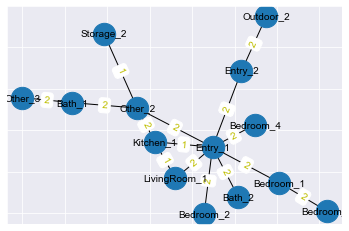

<class 'int'>
True


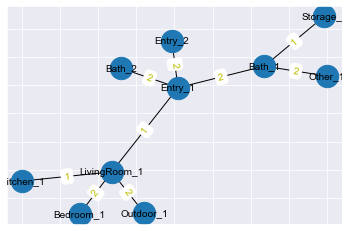

In [21]:
functions.visualize(G)
print(type(G.degree('Entry_1')))
print(type(G.degree('Entry_1'))==int)

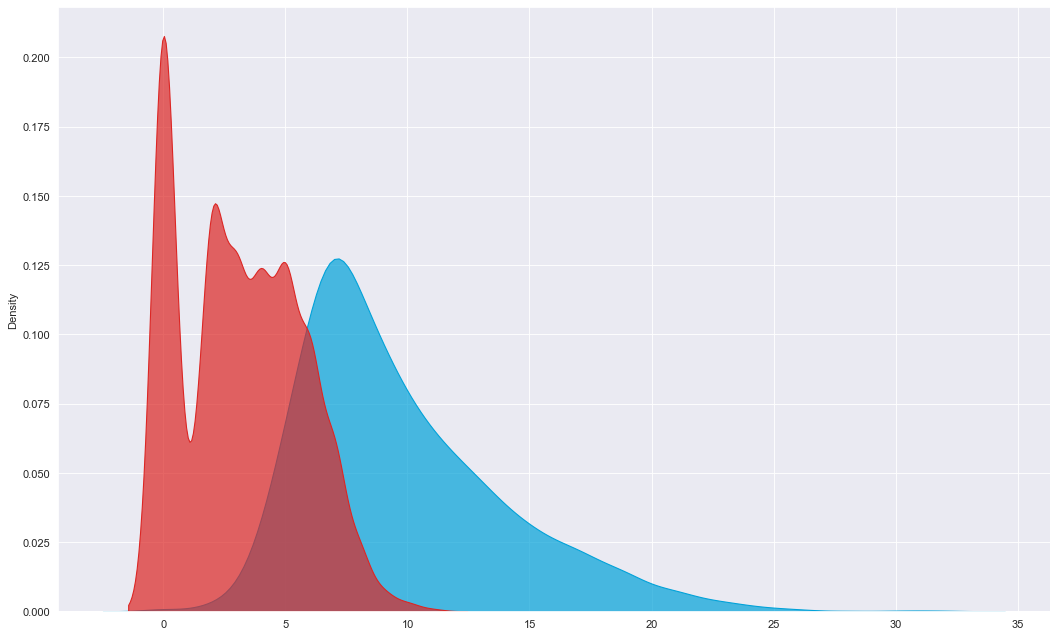

In [23]:
node_num = np.ndarray(shape=(1,len(Gs)),dtype=int)
degree_num = np.ndarray(shape=(1,len(Gs)),dtype=int)
degree_num_2 = np.ndarray(shape=(1,len(Gs)),dtype=int)

for i in range(len(Gs)):
    node_num[0][i] = len(Gs[i].nodes)
    degree = Gs[i].degree('Entry_1')
    degree_2 = Gs[i].degree('Entry_2')
    if type(degree) == int:
        degree_num[0][i] = degree
    else:
        degree_num[0][i] = 0
    if type(degree_2) == int:
        degree_num_2[0][i] = degree_2
    else:
        degree_num_2[0][i] = 0

plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(node_num[0],shade=True,color="#01a2d9",label="edge",alpha=.7)
sns.kdeplot(degree_num[0],shade=True,color="#dc2624",label="degree",alpha=.7)

plt.show()

In [22]:
print(Gs[0].nodes)
print(len(Gs[0].nodes))
print(Gs[0].size())

['Outdoor_1', 'LivingRoom_1', 'Entry_1', 'Bath_1', 'Entry_2', 'Bath_2', 'Kitchen_1', 'Bedroom_1', 'Storage_1', 'Other_1']
10
9


[[18. 10. 36. ... 16. 10.  6.]]
[[10  6 17 ...  9  5  4]]
[[1.8        1.66666667 2.11764706 ... 1.77777778 2.         1.5       ]]


C:\Users\HanLi\anaconda3\envs\Cubicasa\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


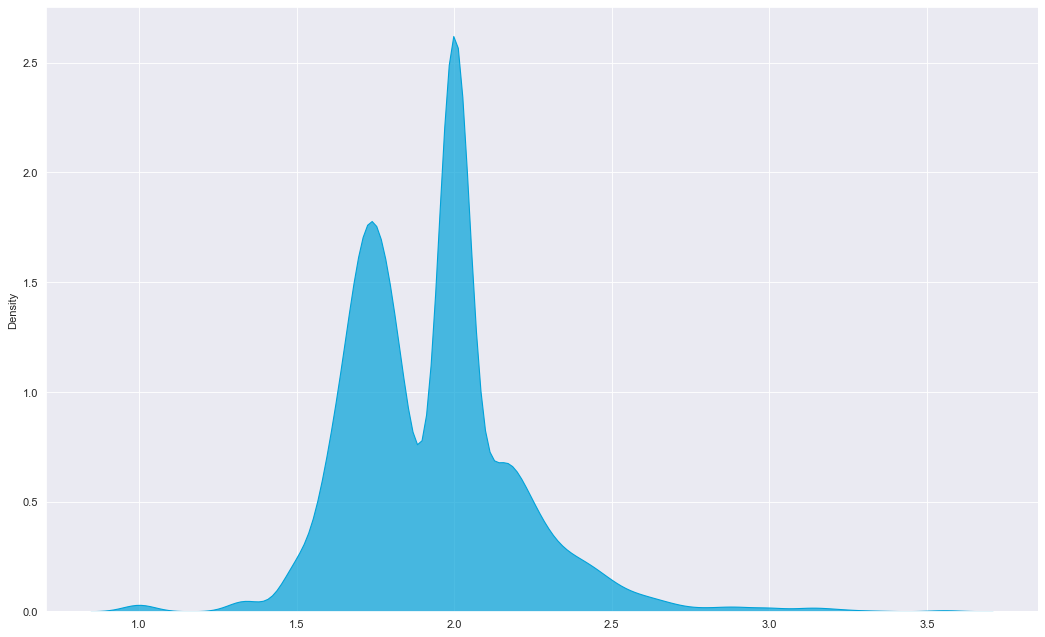

In [25]:
degree_total = np.ndarray(shape=(1,len(Gs)),dtype=float)
for i in range(len(Gs)):
    degree = 0
    for p in Gs[i].nodes:
        degree += Gs[i].degree(p)
    degree_total[0][i] = degree

degree_average = degree_total/node_num
print(degree_total)
print(node_num)
print(degree_average)

plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(degree_average[0],shade=True,color="#01a2d9",label="edge",alpha=.7)

plt.show()

<class 'numpy.ndarray'>


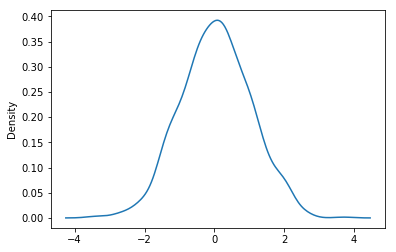

In [59]:
x = np.random.randn(1000)
print(type(x))
sns.kdeplot(x)

Node Entry_1 has neighbor LivingRoom_1
Node Entry_1 has neighbor Bath_1
Node Entry_1 has neighbor Entry_2
Node Entry_1 has neighbor Bath_2
<class 'dict_keyiterator'>
['LivingRoom_1', 'Bath_1', 'Entry_2', 'Bath_2']


NetworkXError: Edge tuple LivingRoom_1 must be a 2-tuple or 3-tuple.